# Partie 1

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [149]:
dic={'1' : '-', '2' : 'a', '3' : 'b', '4': 'c', '5' : 'd', '6' : 'e', '7': 'f', '8' : 'g', '9' : 'h', '10': 'i', '11': 'j',
'12' : 'k', '13' : 'l', '14': 'm', '15' : 'n', '16' : 'o', '17': 'p', '18' : 'q', '19' : 'r' , '20': 's', '21' : 't', '22'
: 'u', '23': 'v', '24' : 'w', '25' : 'x' , '26': 'y', '27' : 'z', '28' : '+' }

In [151]:
dic_inv = {v:k for k,v in dic.items()}

In [155]:
eng = np.loadtxt('./bigramenglish.txt')

In [7]:
eng.shape

(28, 28)

1e ligne: proba de passer de l'etat initial aux autres états.

la derniere colonne correspond aux proba de passer d'un etat quelconque à l'etat final.

In [18]:
[dic[str(x+1)] for x in eng.argmax(axis=0)]

[' ',
 'z',
 ' ',
 'x',
 'n',
 'v',
 'o',
 'n',
 't',
 'v',
 'b',
 'c',
 'l',
 'o',
 'i',
 'j',
 'x',
 'e',
 'p',
 'u',
 'x',
 'q',
 'x',
 ' ',
 'e',
 'b',
 'z',
 ' ']

In [143]:
def gen_next_state(state_t, mat = eng):
    x = np.cumsum(mat[int(state_t)-1])>np.random.random()
    return str(list(x).index(True)+1)

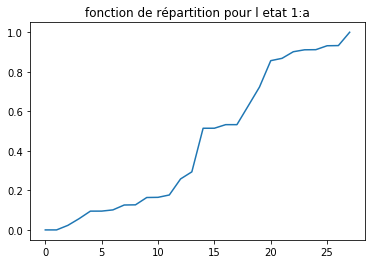

In [35]:
plt.plot(np.cumsum(eng[1]))
plt.title('fonction de répartition pour l etat 1:a')
plt.show()

In [144]:
def genere_state_seq(mat):
    state = '1'
    seq = [state]
    while state != '29':
        next_state = gen_next_state(state, mat)
        seq.append(next_state)
        state = next_state
    return seq

In [61]:
def display_seq(seq):
    seq = [dic[x] for x in seq]
    return ''.join(seq)

In [62]:
display_seq(genere_state_seq())

'trs '

In [156]:
def modifie_mat_dic():
    global dic
    global dic_inv
    global eng
    dic['29'] = '.'
    dic_inv['.'] = '29'
    eng = np.c_[ eng, np.zeros((28,1)) ]
    eng = np.r_[ eng, np.zeros((1,29)) ]
    eng[-2,-1] = 0.1
    eng[-2,-2] = 0
    eng[-2,0] = 0.9

In [159]:
modifie_mat_dic()

In [136]:
display_seq(genere_state_seq())

'herthe  becekse  wild  htuly  twonthan  suthatis .'

In [87]:
eng.shape

(28, 28)

In [145]:
genere_state_seq(fra)

['1',
 '19',
 '14',
 '6',
 '15',
 '21',
 '6',
 '3',
 '19',
 '28',
 '1',
 '5',
 '6',
 '20',
 '28',
 '1',
 '2',
 '21',
 '28',
 '1',
 '6',
 '20',
 '28',
 '1',
 '18',
 '22',
 '13',
 '6',
 '20',
 '28',
 '1',
 '7',
 '16',
 '20',
 '28',
 '1',
 '5',
 '10',
 '20',
 '21',
 '22',
 '20',
 '21',
 '6',
 '15',
 '10',
 '21',
 '20',
 '28',
 '1',
 '18',
 '21',
 '6',
 '28',
 '1',
 '18',
 '22',
 '20',
 '21',
 '6',
 '28',
 '1',
 '10',
 '28',
 '1',
 '15',
 '20',
 '28',
 '1',
 '2',
 '28',
 '1',
 '13',
 '20',
 '28',
 '1',
 '6',
 '28',
 '1',
 '5',
 '6',
 '28',
 '1',
 '5',
 '16',
 '8',
 '10',
 '28',
 '1',
 '5',
 '10',
 '4',
 '16',
 '15',
 '22',
 '15',
 '16',
 '15',
 '5',
 '6',
 '28',
 '29']

In [138]:
fra = np.loadtxt('./bigramfrancais.txt')

In [139]:
fra.shape

(28, 28)

In [140]:
fra = np.c_[ fra, np.zeros((28,1)) ]
fra = np.r_[ fra, np.zeros((1,29)) ]
fra[-2,-1] = 0.1
fra[-2,-2] = 0
fra[-2,0] = 0.9

In [167]:
def calc_vraisemblance(sentence, mat):
    sentence = '-'+sentence.replace(' ','+-')+'+.'
    seq = [dic_inv[x] for x in sentence]
    p = 1
    for i,j in zip(seq[:-1], seq[1:]):
        p*=mat[int(i)-1,int(j)-1]
    return p

In [168]:
calc_vraisemblance('to be or not to be', eng)

8.112892227809415e-20

In [169]:
calc_vraisemblance('to be or not to be', fra)

5.9602081018686406e-30

In [171]:
calc_vraisemblance('etre ou ne pas etre', eng)

4.462288711775253e-24

In [172]:
calc_vraisemblance('etre ou ne pas etre', fra)

1.145706887234789e-19

In [173]:
def compare_vraisemblance(seq):
    return calc_vraisemblance(seq, eng)/calc_vraisemblance(seq, fra)

In [174]:
compare_vraisemblance('bonjour')

6.351037477604507

In [177]:
compare_vraisemblance('salopette')

0.18556060142896377

# HMM

In [182]:
v = np.loadtxt('./55datatxtcompact/data_txt_compact/matrice_symboles.txt')

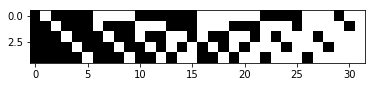

In [183]:
plt.imshow(v, cmap='gray')

In [185]:
A0 = np.loadtxt('./55datatxtcompact/data_txt_compact/A0.txt')

In [186]:
B0 = np.loadtxt('./55datatxtcompact/data_txt_compact/B0.txt')

In [184]:
P0 = np.loadtxt('./55datatxtcompact/data_txt_compact/vect_pi0.txt')

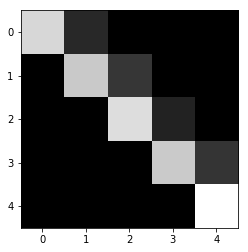

In [201]:
plt.imshow(A0, cmap='gray')

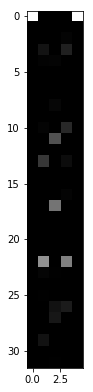

In [197]:
plt.figure(figsize=(1,8))
plt.imshow(B0, cmap='gray')

In [233]:
np.sum(B0, axis=0)

array([1.        , 0.99994644, 0.99937824, 0.99999963, 1.        ])

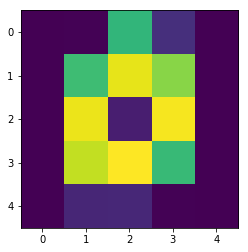

In [200]:
plt.imshow(v@B0)

In [208]:
def generate_next_state(state_t, mat=A0):
    x = np.cumsum(mat[state_t])>np.random.random()
    return list(x).index(True)

In [231]:
def generate_seq():
    seq = []
    state = 0
    while state !=4:
        n_state = generate_next_state(state)
        seq.append(n_state)
        state = n_state
    return seq

In [242]:
def generate_obs(state):
    x = np.cumsum(B0[:,state])>np.random.random()
    idx = list(x).index(True)
    obs = v[:,idx]
    return obs

In [263]:
generate_obs(0).reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

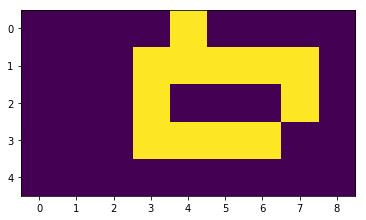

In [267]:
seq = generate_seq()
plt.imshow(np.hstack([generate_obs(s).reshape(-1,1) for s in generate_seq()]))

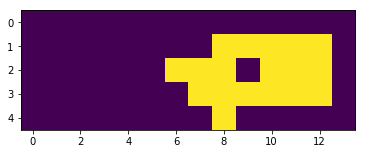

In [276]:
seq = generate_seq()
plt.imshow(np.hstack([generate_obs(s).reshape(-1,1) for s in generate_seq()]))